In [7]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
data = pd.read_csv("C:/Users/USER/document/malaria.csv")
print(data.head())

   Country Name  Year Country Code  \
0       Algeria  2007          DZA   
1        Angola  2007          AGO   
2         Benin  2007          BEN   
3      Botswana  2007          BWA   
4  Burkina Faso  2007          BFA   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  \
0                    26.0   
1               1533485.0   
2                     0.0   
3                   390.0   
4                 44246.0   

   Use of insecticide-treated bed nets (% of under-5 population)  \
0                                                NaN               
1                                               18.0               
2                                          

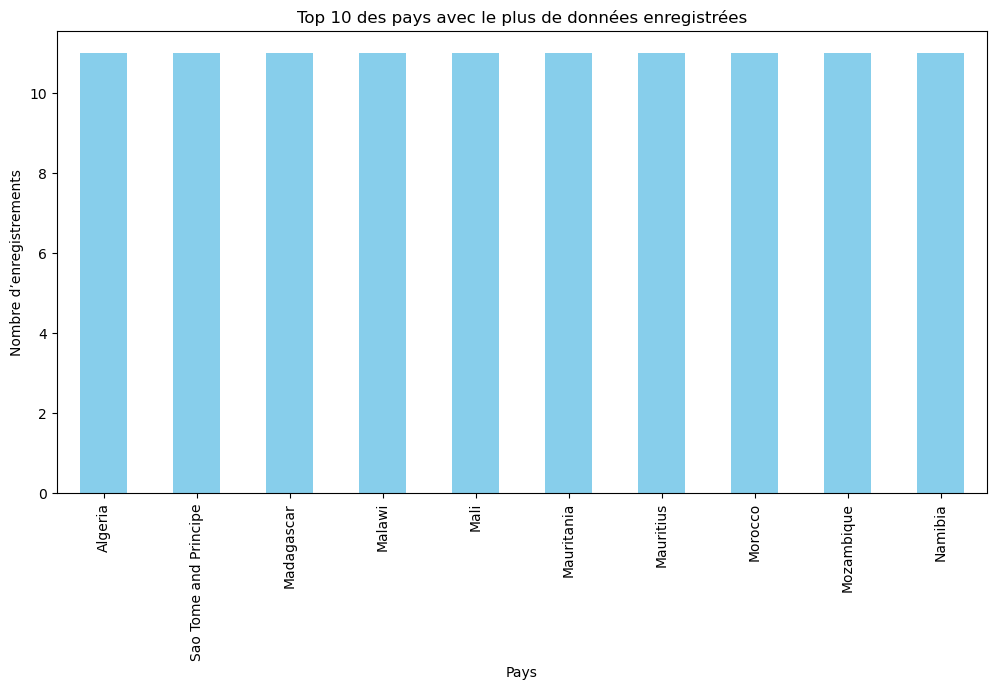

In [29]:
plt.figure(figsize=(12,6))
data["Country Name"].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 des pays avec le plus de données enregistrées")
plt.xlabel("Pays")
plt.ylabel("Nombre d’enregistrements")
plt.show()

In [31]:
data["Children with fever receiving antimalarial drugs (% of children under age 5 with fever)"].describe()

count    122.000000
mean      30.201639
std       18.903198
min        0.500000
25%       17.275000
50%       29.300000
75%       42.625000
max       76.900000
Name: Children with fever receiving antimalarial drugs (% of children under age 5 with fever), dtype: float64

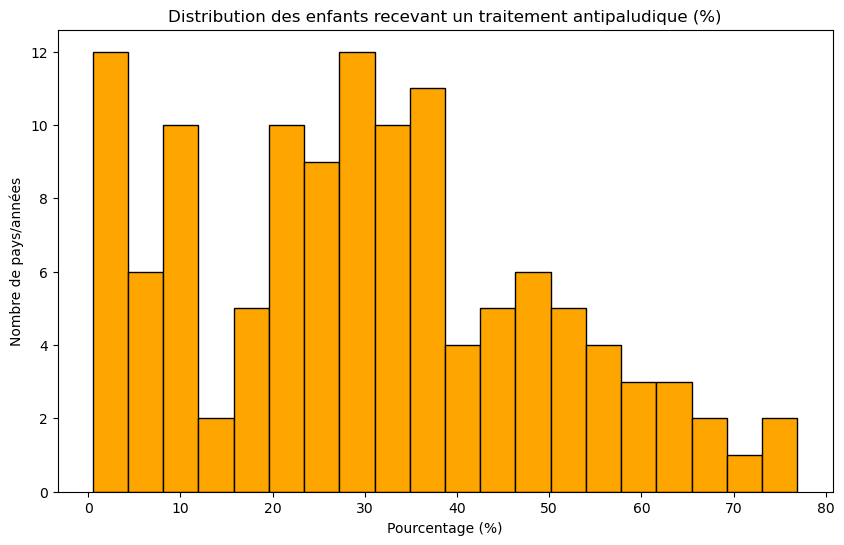

In [33]:
plt.figure(figsize=(10,6))
plt.hist(data["Children with fever receiving antimalarial drugs (% of children under age 5 with fever)"].dropna(), bins=20, color='orange', edgecolor='black')
plt.title("Distribution des enfants recevant un traitement antipaludique (%)")
plt.xlabel("Pourcentage (%)")
plt.ylabel("Nombre de pays/années")
plt.show()

In [35]:
# Créer une colonne catégorielle : Résultat du test
data["Test_Result"] = data["Incidence of malaria (per 1,000 population at risk)"].apply(
    lambda x: "Positive" if x > 100 else "Negative"
)

# Compter les cas positifs et négatifs
data["Test_Result"].value_counts()

Test_Result
Positive    320
Negative    274
Name: count, dtype: int64

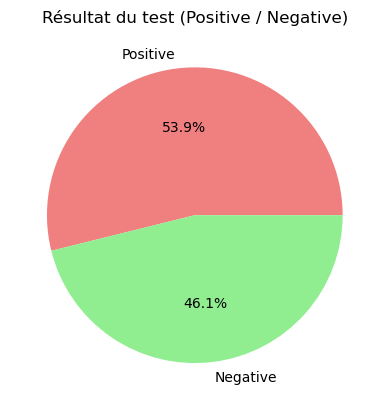

In [37]:
data["Test_Result"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
plt.title("Résultat du test (Positive / Negative)")
plt.ylabel("")
plt.show()

In [39]:
data["Outcome"] = data["Malaria cases reported"].apply(lambda x: "Survivor" if x == 0 else "Infected")
data["Outcome"].value_counts()

Outcome
Infected    514
Survivor     80
Name: count, dtype: int64

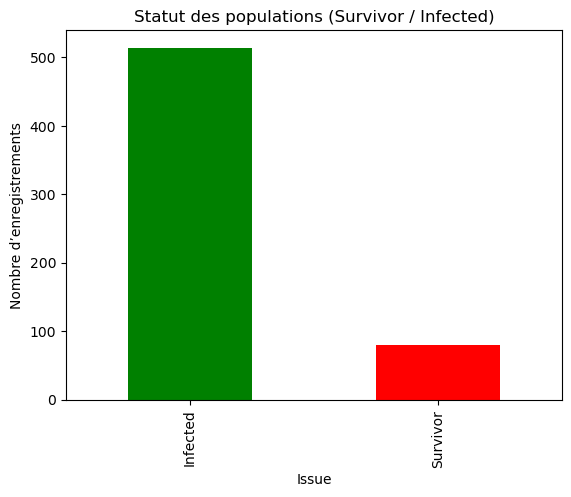

In [41]:
data["Outcome"].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Statut des populations (Survivor / Infected)")
plt.xlabel("Issue")
plt.ylabel("Nombre d’enregistrements")
plt.show()

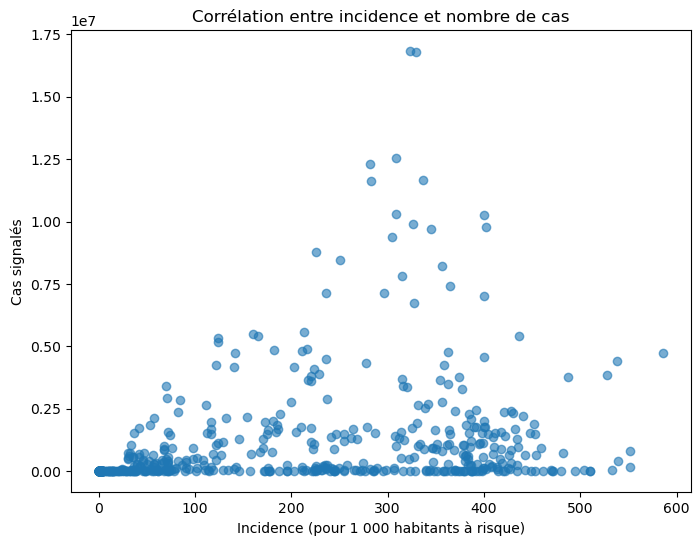

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(data["Incidence of malaria (per 1,000 population at risk)"], data["Malaria cases reported"], alpha=0.6)
plt.title("Corrélation entre incidence et nombre de cas")
plt.xlabel("Incidence (pour 1 000 habitants à risque)")
plt.ylabel("Cas signalés")
plt.show()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 29 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [53]:
print(data.isnull().sum())

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service